In [1]:
import numpy as np
import pandas as pd

In [3]:
np.random.seed(23)

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0], [0,1,0], [0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

In [5]:
df = pd.DataFrame(class1_sample, columns=['feature1', 'feature2', 'feature3'])
df['target'] = 1
df.head()

,feature1,feature2,feature3,target
0,0.666988,0.025813,-0.777619,1
1,0.948634,0.701672,-1.051082,1
2,-0.367548,-1.137460,-1.322148,1
3,1.772258,-0.347459,0.670140,1
4,0.322272,0.060343,-1.043450,1


In [6]:
mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0], [0,1,0], [0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

In [8]:
df1 = pd.DataFrame(class2_sample, columns=['feature1', 'feature2', 'feature3'])
df1['target'] = 0

df = pd.concat([df, df1], ignore_index=True)

df = df.sample(40)
df.head()

,feature1,feature2,feature3,target
2,-0.367548,-1.137460,-1.322148,1
34,0.177061,-0.598109,1.226512,0
14,0.420623,0.411620,-0.071324,1
11,1.968435,-0.547788,-0.679418,1
12,-2.506230,0.146960,0.606195,1


In [15]:
import plotly.express as px

fig = px.scatter_3d(df, x='feature1', y='feature2', z='feature3', color=df['target'].astype('str'))

fig.update_traces(marker=dict(size=12, line=dict(width=2, color='DarkSlateGrey')), selector=dict(mode='markers'))

fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

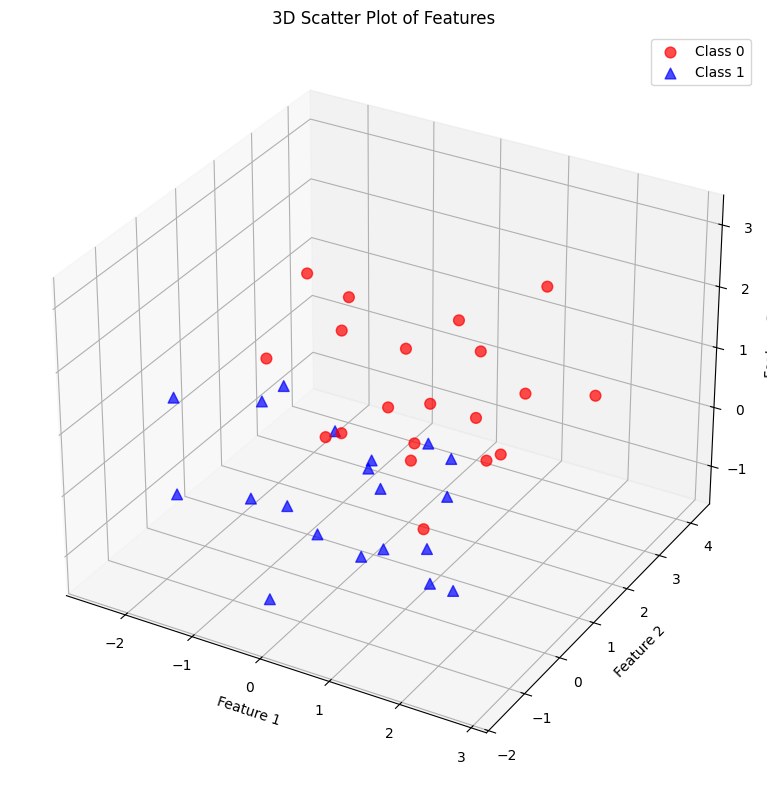

If you want to use Plotly, try installing/updating plotly and nbformat:
pip install --upgrade plotly nbformat jupyter-dash
Then restart your kernel and try the Plotly code again.


In [16]:
# Alternative approach using matplotlib for 3D visualization
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot class 0 (target=0)
class0 = df[df['target'] == 0]
ax.scatter(class0['feature1'], class0['feature2'], class0['feature3'], 
           c='red', marker='o', s=60, alpha=0.7, label='Class 0')

# Plot class 1 (target=1)
class1 = df[df['target'] == 1]
ax.scatter(class1['feature1'], class1['feature2'], class1['feature3'], 
           c='blue', marker='^', s=60, alpha=0.7, label='Class 1')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('3D Scatter Plot of Features')
ax.legend()

plt.tight_layout()
plt.show()

print("If you want to use Plotly, try installing/updating plotly and nbformat:")
print("pip install --upgrade plotly nbformat jupyter-dash")
print("Then restart your kernel and try the Plotly code again.")

## Steps for PCA

#### Step 1: Apply standard scaling (mean centering)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df.iloc[:, 0:3] = scaler.fit_transform(df.iloc[:, 0:3])

#### Step 2: Find covariance matrix

In [21]:
covariance_matrix = np.cov([df.iloc[:, 0], df.iloc[:,1], df.iloc[:,2]])
print("Covariance Matrix:")
print(covariance_matrix)
print("Diagonal elements: Variance of respective columns")
print("Non-diagonal elements: Covariance")

Covariance Matrix:
[[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]
Diagonal elements: Variance of respective columns
Non-diagonal elements: Covariance


#### Step 3: Find eigen vectors and eigen values

In [22]:
# In case of 3D data, we get 3 eigen values and 3 eigen vectors
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

print("Eigen values:\n", eigen_values)
print("Eigen vectors:\n", eigen_vectors)

Eigen values:
 [1.3536065  0.94557084 0.77774573]
Eigen vectors:
 [[-0.53875915 -0.69363291  0.47813384]
 [-0.65608325 -0.01057596 -0.75461442]
 [-0.52848211  0.72025103  0.44938304]]


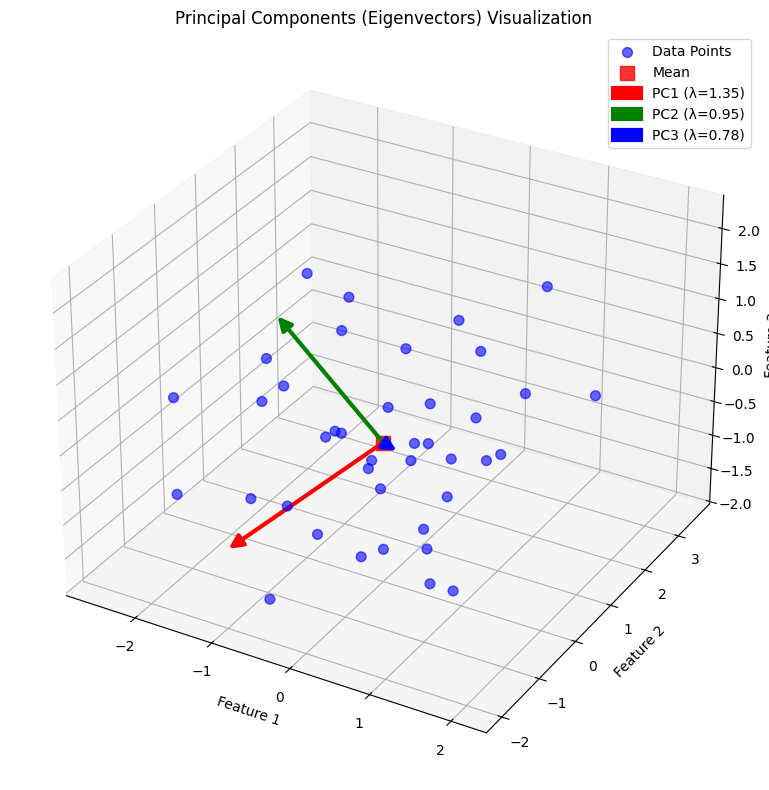

The arrows represent the principal components:
- Length indicates the importance (eigenvalue)
- Direction shows the principal component direction
PC1: Eigenvalue = 1.3536 (44.0% of variance)
PC2: Eigenvalue = 0.9456 (30.7% of variance)
PC3: Eigenvalue = 0.7777 (25.3% of variance)


In [25]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch


class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        return np.min(zs)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(df['feature1'], df['feature2'], df['feature3'], 
           c='blue', marker='o', s=50, alpha=0.6, label='Data Points')

# Plot the mean point
mean_x, mean_y, mean_z = df['feature1'].mean(), df['feature2'].mean(), df['feature3'].mean()
ax.scatter([mean_x], [mean_y], [mean_z], 
           c='red', marker='s', s=100, alpha=0.8, label='Mean')

# Plot eigenvectors as arrows from the mean point
colors = ['red', 'green', 'blue']
for i, (eigenval, eigenvec) in enumerate(zip(eigen_values, eigen_vectors.T)):
    # Scale the eigenvector by its eigenvalue for better visualization
    scale = np.sqrt(eigenval) * 2  # Scale factor for visibility
    
    # Arrow from mean to mean + scaled eigenvector
    arrow = Arrow3D([mean_x, mean_x + eigenvec[0] * scale], 
                    [mean_y, mean_y + eigenvec[1] * scale], 
                    [mean_z, mean_z + eigenvec[2] * scale], 
                    mutation_scale=20, lw=3, arrowstyle="-|>", 
                    color=colors[i], label=f'PC{i+1} (λ={eigenval:.2f})')
    ax.add_artist(arrow)

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('Principal Components (Eigenvectors) Visualization')
ax.legend()

plt.tight_layout()
plt.show()

print("The arrows represent the principal components:")
print("- Length indicates the importance (eigenvalue)")
print("- Direction shows the principal component direction")
for i, val in enumerate(eigen_values):
    print(f"PC{i+1}: Eigenvalue = {val:.4f} ({val/sum(eigen_values)*100:.1f}% of variance)")

In [27]:
# Pick the top 2 principle components
pc = eigen_vectors[0:2]
pc

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442]])

#### Step 4: Project the datapoints to this new coordinate system

In [ ]:
# Take dot product of all values with transpose of PC
# Transpose converts pc from 2x3 to 3x2
transformed_df = np.dot(df.iloc[:, 0:3], pc.T)

new_df = pd.DataFrame(transformed_df, columns=['PC1', 'PC2'])
new_df['target'] = df['target'].values
new_df.head()

,PC1,PC2,target
0,0.599433,1.795862,1
1,1.056919,-0.212737,0
2,-0.271876,0.498222,1
3,-0.621586,0.023110,1
4,1.567286,1.730967,1


In [29]:
new_df.shape

(40, 3)

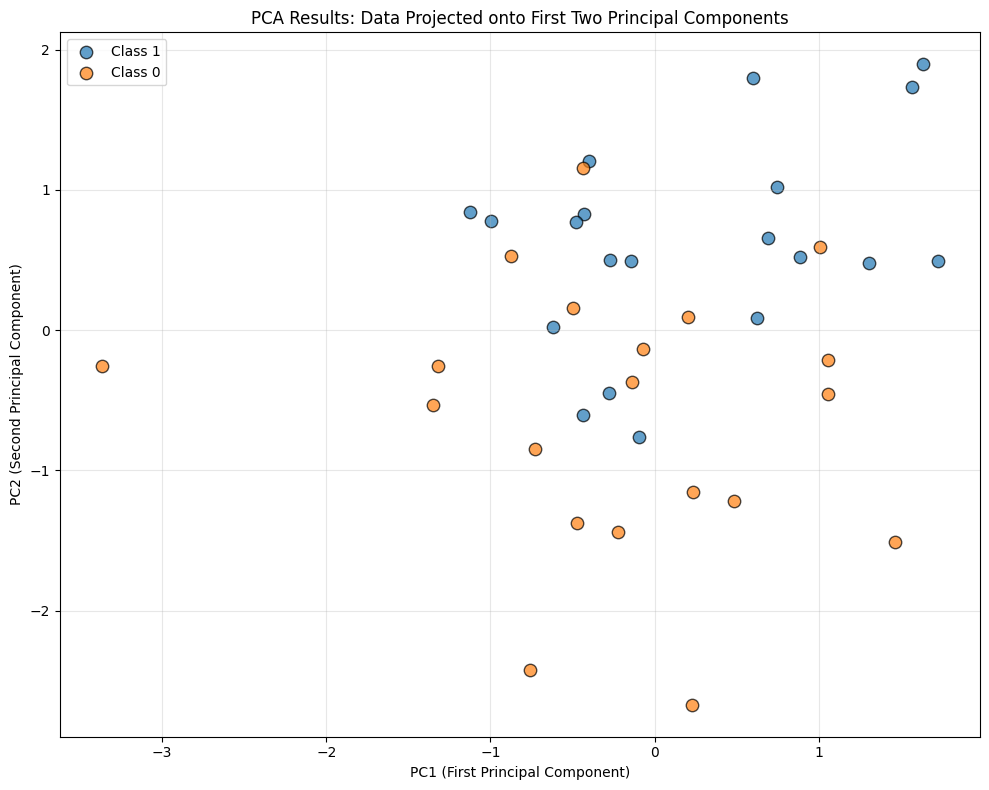

Original data shape: (40, 3)
Transformed data shape: (40, 2)
Successfully reduced from 3D to 2D using PCA!


In [31]:
# Convert to matplotlib scatter plot
plt.figure(figsize=(10, 8))

# Plot each class with different colors
for target_class in new_df['target'].unique():
    class_data = new_df[new_df['target'] == target_class]
    plt.scatter(class_data['PC1'], class_data['PC2'], 
               label=f'Class {target_class}', 
               s=80, alpha=0.7, edgecolors='black', linewidth=1)

plt.xlabel('PC1 (First Principal Component)')
plt.ylabel('PC2 (Second Principal Component)')
plt.title('PCA Results: Data Projected onto First Two Principal Components')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Original data shape: {df.iloc[:, 0:3].shape}")
print(f"Transformed data shape: {new_df[['PC1', 'PC2']].shape}")
print("Successfully reduced from 3D to 2D using PCA!")